In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
df = pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Text Preprocessing

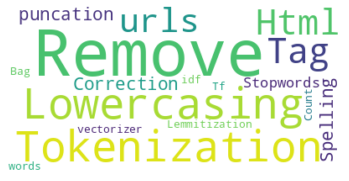

In [3]:
data = ['Lowercasing', 'Tokenization','Remove Html Tag','Remove urls','Remove puncation','Spelling Correction','Stopwords','Lemmitization','Bag of words','Tf-idf','Count vectorizer']
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = " ".join(data)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Lowercasing

In [4]:
df1 = df.copy()
df1['review'].str.lower().head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

# Remove Html Tags

In [5]:
import re
def remove_html_tags(text):
    pattern = re.compile(r'<.*?>')
    return pattern.sub(r'',text)

In [6]:
df1['review'].apply(remove_html_tags).head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. The filming tec...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

# Remove urls

In [7]:
text1  = 'Hola this is my website https://www.youtube.com/watch?v=I63RkFdgjos&list=RDMMJM7EPuZuRV8&index=8 '
text2 =  'Hola follow this https://www.google/com'

def remove_urls(text):
    url = re.sub(r"http\S+", "", text)
    return url

In [8]:
remove_urls(text1), remove_urls(text2)

('Hola this is my website  ', 'Hola follow this ')

# Remove Punctuation

In [9]:
def remove_punc(text):
    return  re.sub(r'[^\w\s]', '', text)


In [10]:
df1['review'].apply(remove_punc)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production br br The filmin...
2        I thought this was a wonderful way to spend ti...
3        Basically theres a family where a little boy J...
4        Petter Matteis Love in the Time of Money is a ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

# Spelling Correction

In [11]:
incorrect_word = 'This is inccorect woed I m textblob do net worrie aboot wrongg wordd i am heree'
from textblob import TextBlob
txtblb = TextBlob(incorrect_word)
txtblb.correct().string

'His is incorrect word I m textbook do net worried about wrong words i am here'

# 